# House Prices – Advanced Regression Dataset

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Load Dataset

In [18]:
df = pd.read_csv('train.csv')
df = pd.read_csv('test.csv')

In [19]:
print("Train Shape: ",df.shape)
print("Test Shape: ",df.shape)
df.head()


Train Shape:  (1459, 80)
Test Shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Check Missing Values

In [20]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)



PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


# Check for NULL values

# Train Data

In [7]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<Axes: >

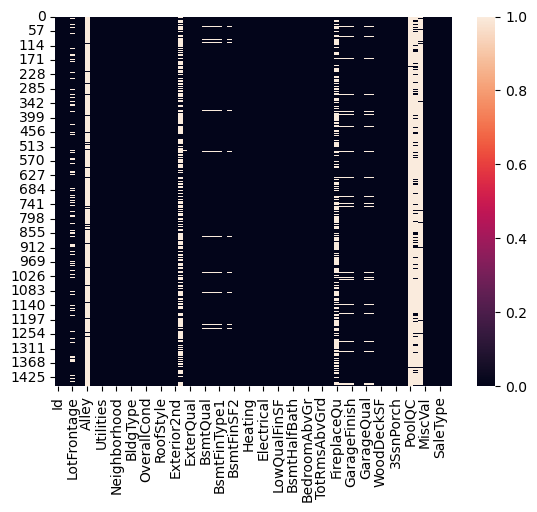

In [8]:
sns.heatmap(train.isnull())

# Test Data

In [9]:
print(test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


<Axes: >

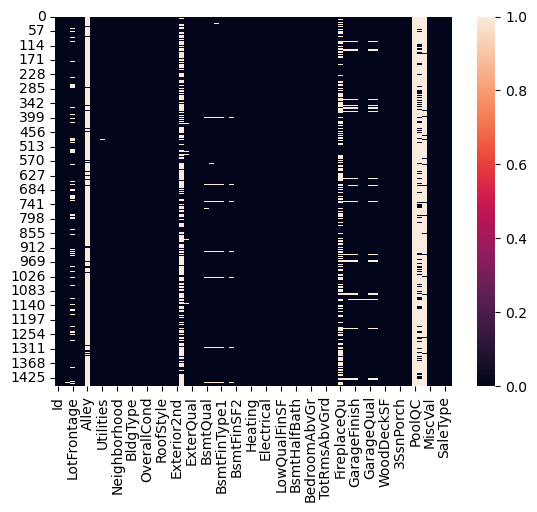

In [10]:
sns.heatmap(test.isnull())

# Handling NULL data

# For train data

In [11]:
cat_col_train = ['FireplaceQu','GarageType','GarageFinish','MasVnrType','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
          'GarageQual','GarageCond']

ncat_col_train = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [12]:
for i in cat_col_train:
    train[i] = train[i].fillna(train[i].mode()[0])
    
for j in ncat_col_train:
    train[j] = train[j].fillna(train[j].mean())

# For test data

In [13]:
cat_col_test = ['FireplaceQu','GarageType','GarageFinish','MasVnrType','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
          'GarageQual','GarageCond','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']

ncat_col_test = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
                'BsmtHalfBath','GarageCars','GarageArea']

In [14]:
for i in cat_col_test:
    test[i] = test[i].fillna(test[i].mode()[0])
    
for j in ncat_col_test:
    test[j] = test[j].fillna(test[j].mean())

# Drop Columns

In [15]:
to_drop = ['Id','Alley','PoolQC','Fence','MiscFeature']

for k in to_drop:
    train.drop([k], axis = 1, inplace = True)
    test.drop([k], axis = 1, inplace = True)

<Axes: >

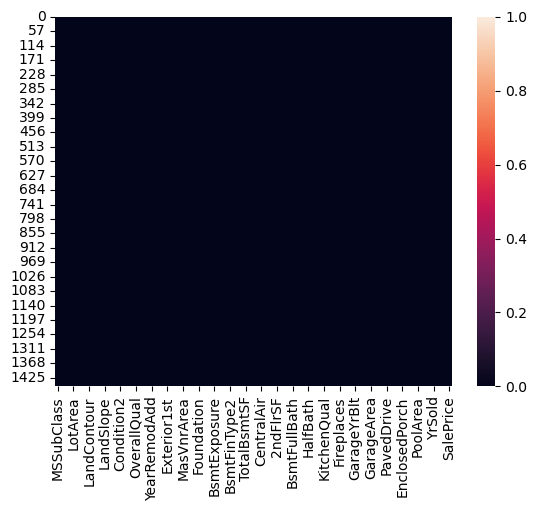

In [16]:
sns.heatmap(train.isnull())

<Axes: >

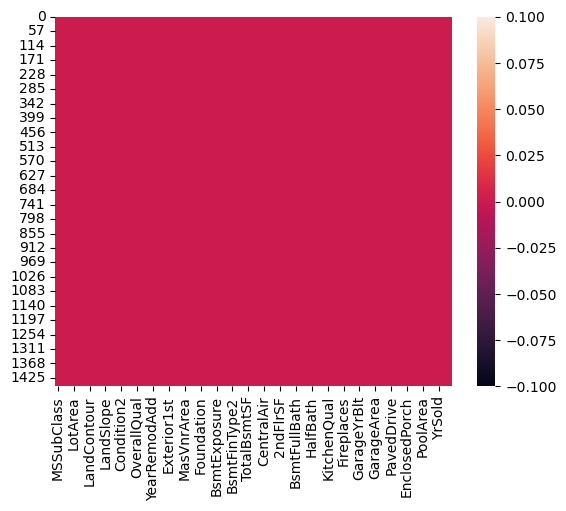

In [17]:
sns.heatmap(test.isnull())